# Goal
### Clean and preprocess the collected data to remove errors, handle missing values, and transform it into a suitable format for analysis. 
**Tasks**: data cleaning, data integration, data transformation etc

### *2018 Data* 

In [107]:
import pandas as pd;pd.set_option('display.max_columns', 1000);# pd.set_option('display.max_rows', 1000) ; pd.set_option('display.width', 1000)
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# read the 2018 baywheels data
baywheels_df = pd.read_csv('baywheels_2018', low_memory=False, index_col=0)

In [4]:
# convert the start_time and end_time object into datetime64 objects
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')

In [5]:
baywheels_df

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id
0       2018-04-26 18:04:41 2018-04-26 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0
1       2018-05-18 19:34:12 2018-05-18 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0
2       2018-07-14 14:57:05 2018-07-14 15:10:37             70.0     37.7733108789   -122.4442926049          109.0      37.7633158     -122.4219039  1964.0
3       2018-11-11 16:35:22 2018-11-11 16:45:37            160.0        37.8053183      -122.2948365          220.0      37.8113514     -122.2734217  3580.0
4       2018-12-15 10:15:24 2018-12-15 10:20:23             72.0         37.772406      -122.4356498          119.0      37.7610471     -122.4326417  5247.0
...                     ...                 ...              ...               ...               ...            ...             ...              ...     ...
1863726 2018-05-09 08:23:45 2018-05-09 08:29:02             30.0         37.776598       -122.395282           36.0        37.78383       -122.39887   369.0
1863727 2018-12-22 19:28:59 2018-12-22 19:40:22            146.0        37.7423139      -122.4231805           98.0       37.765052     -122.4218661  2940.0
1863728 2018-05-05 10:49:33 2018-05-05 11:03:30            122.0         37.760299       -122.418892          121.0      37.7592103     -122.4213392  2095.0
1863729 2018-05-09 08:55:21 2018-05-09 09:11:35             25.0     37.7875217805   -122.3974049091          123.0      37.7605936     -122.4148171  3570.0
1863730 2018-02-08 18:01:18 2018-02-08 18:06:40            176.0     37.8284099731   -122.2663146257          211.0      37.8277573     -122.2567156  3361.0

[1863731 rows x 9 columns]

### Handling missing values

In [6]:
# number of Na values 
baywheels_df.isna().sum().sum()

23562

In [7]:
baywheels_df.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id             object
start_station_lat            object
start_station_lon            object
end_station_id               object
end_station_lat              object
end_station_lon              object
bike_id                      object
dtype: object

In [8]:
baywheels_df.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id             object
start_station_lat            object
start_station_lon            object
end_station_id               object
end_station_lat              object
end_station_lon              object
bike_id                      object
dtype: object

In [9]:
baywheels_df.head(2)

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id
0 2018-04-26 18:04:41 2018-04-26 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0
1 2018-05-18 19:34:12 2018-05-18 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0

In [10]:
#identify the NaT values in start_time
na_start_values = baywheels_df['start_time'].isna()
na_start_rows = baywheels_df[na_start_values]

na_start_rows

start_time end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon  bike_id
439433         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
481488         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
689379         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
896954         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
959289         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1291280        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1500621        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1525798        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1604523        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1861419        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure

In [11]:
#identify the NaT values in end_time
na_end_values = baywheels_df['end_time'].isna()
na_end_rows = baywheels_df[na_end_values]

na_end_rows

start_time end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon  bike_id
439433         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
481488         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
689379         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
896954         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
959289         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1291280        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1500621        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1525798        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1604523        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1861419        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure

In [12]:
na_rows = pd.concat([na_start_rows, na_end_rows])

na_rows # the rows with missing values are the same for both columns (10 rows)

start_time end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon  bike_id
439433         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
481488         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
689379         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
896954         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
959289         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1291280        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1500621        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1525798        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1604523        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1861419        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
439433         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
481488         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
689379         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
896954         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
959289         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1291280        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1500621        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1525798        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1604523        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1861419        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure

In [13]:
# check the start_time column
baywheels_df['start_time']

0         2018-04-26 18:04:41
1         2018-05-18 19:34:12
2         2018-07-14 14:57:05
3         2018-11-11 16:35:22
4         2018-12-15 10:15:24
                  ...        
1863726   2018-05-09 08:23:45
1863727   2018-12-22 19:28:59
1863728   2018-05-05 10:49:33
1863729   2018-05-09 08:55:21
1863730   2018-02-08 18:01:18
Name: start_time, Length: 1863731, dtype: datetime64[ns]

In [14]:
# drop the NaT values
baywheels_df.dropna(subset=['start_time'], inplace=True)

In [15]:
# check the start_time column after dropna
baywheels_df['start_time']

0         2018-04-26 18:04:41
1         2018-05-18 19:34:12
2         2018-07-14 14:57:05
3         2018-11-11 16:35:22
4         2018-12-15 10:15:24
                  ...        
1863726   2018-05-09 08:23:45
1863727   2018-12-22 19:28:59
1863728   2018-05-05 10:49:33
1863729   2018-05-09 08:55:21
1863730   2018-02-08 18:01:18
Name: start_time, Length: 1863721, dtype: datetime64[ns]

In [16]:
# add a column 'duration' to baywheels_df
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)


In [17]:
baywheels_df.head(2)

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id   trip_duration
0 2018-04-26 18:04:41 2018-04-26 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0 0 days 00:05:26
1 2018-05-18 19:34:12 2018-05-18 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0 0 days 00:03:45

In [18]:
# duration column is a time delta object
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   object         
 3   start_station_lat  object         
 4   start_station_lon  object         
 5   end_station_id     object         
 6   end_station_lat    object         
 7   end_station_lon    object         
 8   bike_id            object         
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), object(7), timedelta64[ns](1)
memory usage: 156.4+ MB


In [19]:
# show min, max, mean values 
min = baywheels_df['trip_duration'].min()
mean = baywheels_df['trip_duration'].mean()
max = baywheels_df['trip_duration'].max()
print('min:',min)
print('max:',max)
print('mean:',mean)

min: -1 days +23:02:51
max: 0 days 23:59:26
mean: 0 days 00:14:17.797020047


In [20]:
pd.Timedelta(0)


Timedelta('0 days 00:00:00')

In [21]:
# show negative duration values 
negative_values = baywheels_df[baywheels_df['trip_duration'] < pd.Timedelta(0)]
negative_values #the durations are negative because of the change between summer time and
                #winter time at Sunday 4th November

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id     trip_duration
223042  2018-11-04 01:48:20 2018-11-04 01:02:58             59.0         37.774814       -122.418954           27.0      37.7880593     -122.3918648  2331.0 -1 days +23:14:38
840962  2018-11-04 01:52:40 2018-11-04 01:02:27            375.0     37.7748362941   -122.4465456605           95.0      37.7662185     -122.4310597  3144.0 -1 days +23:09:47
1129000 2018-11-04 01:51:00 2018-11-04 01:06:56            183.0        37.8087021      -122.2699271          149.0      37.8312752     -122.2856333   417.0 -1 days +23:15:56
1131781 2018-11-04 01:59:54 2018-11-04 01:07:50             67.0        37.7766392      -122.3955263           37.0   37.7849997283  -122.3959356175  1497.0 -1 days +23:07:56
1238539 2018-11-04 01:58:47 2018-11-04 01:01:38            132.0        37.7518194      -122.4266139          134.0      37.7524278     -122.4206278  2487.0 -1 days +23:02:51
1511289 2018-11-04 01:59:01 2018-11-04 01:02:48             41.0          37.78127        -122.41874           61.0      37.7765126     -122.4113061  2136.0 -1 days +23:03:47

In [22]:
# add 1 hour to the affected columns
rows_to_add_1hour = [223042, 840962, 1129000, 1131781, 1238539, 1511289]
for row_index in rows_to_add_1hour:
    baywheels_df.loc[row_index, 'end_time'] += pd.Timedelta(hours=1)
    print(baywheels_df.loc[row_index, 'end_time'])

2018-11-04 02:02:58
2018-11-04 02:02:27
2018-11-04 02:06:56
2018-11-04 02:07:50
2018-11-04 02:01:38
2018-11-04 02:02:48


In [23]:
# update the duration column
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)

In [24]:
#check if it worked
negative_values = baywheels_df[baywheels_df['trip_duration'] < pd.Timedelta(0)]
negative_values

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

In [25]:
# check the minimum again
min = baywheels_df['trip_duration'].min()
min

Timedelta('0 days 00:01:01')

In [26]:
# show positive duration values
positive_values = baywheels_df[baywheels_df['trip_duration'] > pd.Timedelta(0)]
positive_values

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id   trip_duration
0       2018-04-26 18:04:41 2018-04-26 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0 0 days 00:05:26
1       2018-05-18 19:34:12 2018-05-18 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0 0 days 00:03:45
2       2018-07-14 14:57:05 2018-07-14 15:10:37             70.0     37.7733108789   -122.4442926049          109.0      37.7633158     -122.4219039  1964.0 0 days 00:13:32
3       2018-11-11 16:35:22 2018-11-11 16:45:37            160.0        37.8053183      -122.2948365          220.0      37.8113514     -122.2734217  3580.0 0 days 00:10:15
4       2018-12-15 10:15:24 2018-12-15 10:20:23             72.0         37.772406      -122.4356498          119.0      37.7610471     -122.4326417  5247.0 0 days 00:04:59
...                     ...                 ...              ...               ...               ...            ...             ...              ...     ...             ...
1863726 2018-05-09 08:23:45 2018-05-09 08:29:02             30.0         37.776598       -122.395282           36.0        37.78383       -122.39887   369.0 0 days 00:05:17
1863727 2018-12-22 19:28:59 2018-12-22 19:40:22            146.0        37.7423139      -122.4231805           98.0       37.765052     -122.4218661  2940.0 0 days 00:11:23
1863728 2018-05-05 10:49:33 2018-05-05 11:03:30            122.0         37.760299       -122.418892          121.0      37.7592103     -122.4213392  2095.0 0 days 00:13:57
1863729 2018-05-09 08:55:21 2018-05-09 09:11:35             25.0     37.7875217805   -122.3974049091          123.0      37.7605936     -122.4148171  3570.0 0 days 00:16:14
1863730 2018-02-08 18:01:18 2018-02-08 18:06:40            176.0     37.8284099731   -122.2663146257          211.0      37.8277573     -122.2567156  3361.0 0 days 00:05:22

[1863721 rows x 10 columns]

In [27]:
#check bike_id for Nan Values
baywheels_df['bike_id'].describe()

count     1863721
unique       5054
top        3961.0
freq         1220
Name: bike_id, dtype: object

In [28]:
#check nan values in bike_id 
nan_bike_id = baywheels_df['bike_id'].isna()
nan_bike_id_rows = baywheels_df[nan_bike_id]
nan_bike_id_rows

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

### check nan values in start_station_id

In [29]:
#check nan values in start_station_id
nan_start_station_id = baywheels_df['start_station_id'].isna()
nan_start_station_id_rows = baywheels_df[nan_start_station_id]
nan_start_station_id_rows

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
401     2018-11-17 13:41:26 2018-11-17 13:44:57              NaN             37.41           -121.95            NaN           37.41         -121.94  4256.0 0 days 00:03:31
532     2018-07-18 21:16:40 2018-07-18 21:20:22              NaN             37.41           -121.95            NaN           37.42         -121.95  4205.0 0 days 00:03:42
674     2018-09-28 09:14:06 2018-09-28 09:23:57              NaN             37.41           -121.96            NaN            37.4         -121.94  4148.0 0 days 00:09:51
825     2018-06-19 19:07:49 2018-06-19 19:50:04              NaN              37.4           -121.93            NaN           37.39         -121.94  4083.0 0 days 00:42:15
941     2018-07-21 09:21:19 2018-07-21 09:30:13              NaN              37.4           -121.94            NaN            37.4         -121.93  4288.0 0 days 00:08:54
...                     ...                 ...              ...               ...               ...            ...             ...             ...     ...             ...
1863397 2018-08-06 19:16:48 2018-08-06 19:22:06              NaN             37.39           -121.93            NaN           37.38         -121.93  4152.0 0 days 00:05:18
1863454 2018-07-16 19:28:52 2018-07-16 19:58:28              NaN             37.41           -121.94            NaN           37.41         -121.95  4117.0 0 days 00:29:36
1863465 2018-07-27 14:48:18 2018-07-27 15:19:20              NaN             37.33           -121.91            NaN           37.35          -121.9  4097.0 0 days 00:31:02
1863492 2018-08-16 19:27:19 2018-08-16 19:42:18              NaN             37.41           -121.96            NaN            37.4         -121.93  4128.0 0 days 00:14:59
1863624 2018-08-06 20:40:50 2018-08-06 21:08:14              NaN              37.4           -121.94            NaN            37.4         -121.94  4288.0 0 days 00:27:24

[11771 rows x 10 columns]

In [30]:
#fill in NaN values in start_station_id and end_station_id by comparing the latitude and longitude
from scipy.spatial import cKDTree

def fill_nan_station_ids(df):
    stations = df[['start_station_id', 'start_station_lat', 'start_station_lon']].copy()
    stations.dropna(subset=['start_station_id'], inplace=True)
    station_coords = stations[['start_station_lat', 'start_station_lon']].values
    station_ids = stations['start_station_id'].values
    tree = cKDTree(station_coords)

    nan_start_station_mask = df['start_station_id'].isnull()
    start_station_coords = df.loc[nan_start_station_mask, ['start_station_lat', 'start_station_lon']].values
    _, nearest_station_indices = tree.query(start_station_coords)
    nearest_station_ids = station_ids[nearest_station_indices]
    df.loc[nan_start_station_mask, 'start_station_id'] = nearest_station_ids

    stations = df[['end_station_id', 'end_station_lat', 'end_station_lon']].copy()
    stations.dropna(subset=['end_station_id'], inplace=True)
    station_coords = stations[['end_station_lat', 'end_station_lon']].values
    station_ids = stations['end_station_id'].values
    tree = cKDTree(station_coords)

    nan_end_station_mask = df['end_station_id'].isnull()
    end_station_coords = df.loc[nan_end_station_mask, ['end_station_lat', 'end_station_lon']].values
    _, nearest_station_indices = tree.query(end_station_coords)
    nearest_station_ids = station_ids[nearest_station_indices]
    df.loc[nan_end_station_mask, 'end_station_id'] = nearest_station_ids

    return df

# Apply the function to fill NaN station IDs in baywheels_df
baywheels_df = fill_nan_station_ids(baywheels_df)
####disclaimer!####
####this code has been provided by ChatGPT####

In [31]:
#check again if the fill worked
nan_start_station_id = baywheels_df['start_station_id'].isna()
nan_start_station_id_rows = baywheels_df[nan_start_station_id]
nan_start_station_id_rows

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

In [32]:
#check again if the fill worked
nan_end_station_id = baywheels_df['end_station_id'].isna()
nan_end_station_id_rows = baywheels_df[nan_end_station_id]
nan_end_station_id_rows

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

In [33]:
#check the row 401 if it still contains the NaN values
row_401 = baywheels_df.iloc[532]
row_401

start_time           2018-07-18 21:16:40
end_time             2018-07-18 21:20:22
start_station_id                   303.0
start_station_lat                  37.41
start_station_lon                -121.95
end_station_id                     303.0
end_station_lat                    37.42
end_station_lon                  -121.95
bike_id                           4205.0
trip_duration            0 days 00:03:42
Name: 532, dtype: object

In [34]:
#check nan values in start_station_lon
nan_start_station_lon = baywheels_df['start_station_lon'].isna()
nan_start_station_lon_rows = baywheels_df[nan_start_station_lon]
nan_start_station_lon_rows

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

In [35]:
#check nan values in start_station_lat
nan_start_station_lat = baywheels_df['start_station_lat'].isna()
nan_start_station_lat_rows = baywheels_df[nan_start_station_lat]
nan_start_station_lat_rows

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

In [36]:
#show most and least used stations by looking at number of trips started
baywheels_df['start_station_id'].value_counts().head() #remove .head() to see the whole list

15.0    38461
67.0    37617
30.0    35092
58.0    34918
81.0    33716
Name: start_station_id, dtype: int64

In [37]:
baywheels_df['start_station_id'].describe()

count     1863721
unique        331
top          15.0
freq        38461
Name: start_station_id, dtype: object

In [38]:
baywheels_df['end_station_id'].describe()

count     1863721
unique        331
top          67.0
freq        50000
Name: end_station_id, dtype: object

In [39]:
baywheels_df['end_station_id'].value_counts().head() #.head() to see the whole list

67.0    50000
15.0    44113
30.0    42970
6.0     39222
21.0    35955
Name: end_station_id, dtype: int64

In [40]:
#convert values to correct data type
baywheels_df['start_station_id'] = baywheels_df['start_station_id'].astype(float).astype(int)
baywheels_df['end_station_id'] = baywheels_df['end_station_id'].astype(float).astype(int)
baywheels_df['bike_id'] = baywheels_df['bike_id'].astype(float).astype(int)

baywheels_df['start_station_lat'] = baywheels_df['start_station_lat'].astype(float)
baywheels_df['start_station_lon'] = baywheels_df['start_station_lon'].astype(float)
baywheels_df['end_station_lat'] = baywheels_df['end_station_lat'].astype(float)
baywheels_df['end_station_lon'] = baywheels_df['end_station_lon'].astype(float)
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   int64          
 3   start_station_lat  float64        
 4   start_station_lon  float64        
 5   end_station_id     int64          
 6   end_station_lat    float64        
 7   end_station_lon    float64        
 8   bike_id            int64          
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), timedelta64[ns](1)
memory usage: 220.9 MB


### checking outliers

In [41]:
outlier_start_lon = baywheels_df.nlargest(10,'start_station_lon')
outlier_start_lon

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration
370223  2018-08-20 12:07:06 2018-08-20 12:24:09               374              45.50             -73.57             374            45.51           -73.57     4425 0 days 00:17:03
786068  2018-08-20 09:53:14 2018-08-20 09:54:48               374              45.51             -73.57             374            45.51           -73.57     4425 0 days 00:01:34
1027361 2018-08-21 12:11:52 2018-08-21 12:20:13               374              45.50             -73.57             374            45.51           -73.57     4425 0 days 00:08:21
1252096 2018-06-29 08:57:14 2018-06-29 09:01:57               374              45.51             -73.57             374            45.51           -73.57     4295 0 days 00:04:43
1326974 2018-06-11 08:23:37 2018-06-11 08:26:48               374              45.51             -73.57             374            45.51           -73.57     4295 0 days 00:03:11
1727793 2018-06-22 13:36:13 2018-06-22 14:00:16               374              45.51             -73.57             374            45.51           -73.57     4295 0 days 00:24:03
1141648 2018-06-01 13:51:52 2018-06-01 13:53:58               374              40.66             -74.01             374            40.66           -74.01     4297 0 days 00:02:06
1350024 2018-06-01 13:56:04 2018-06-01 13:57:13               374              40.66             -74.01             374            40.66           -74.01     4297 0 days 00:01:09
1707396 2018-06-01 13:47:53 2018-06-01 13:49:00               374              40.66             -74.01             374            40.66           -74.01     4297 0 days 00:01:07
585120  2018-06-26 10:59:12 2018-06-26 14:34:57               374              44.95             -93.22             374            44.95           -93.22     3758 0 days 03:35:45

In [42]:
#checking for outliers in location data start_station_lon
outlier_start_lon = baywheels_df['start_station_lon'].max()
row_with_outlier = baywheels_df[baywheels_df['start_station_lon'] == outlier_start_lon]
row_with_outlier

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration
370223  2018-08-20 12:07:06 2018-08-20 12:24:09               374              45.50             -73.57             374            45.51           -73.57     4425 0 days 00:17:03
786068  2018-08-20 09:53:14 2018-08-20 09:54:48               374              45.51             -73.57             374            45.51           -73.57     4425 0 days 00:01:34
1027361 2018-08-21 12:11:52 2018-08-21 12:20:13               374              45.50             -73.57             374            45.51           -73.57     4425 0 days 00:08:21
1252096 2018-06-29 08:57:14 2018-06-29 09:01:57               374              45.51             -73.57             374            45.51           -73.57     4295 0 days 00:04:43
1326974 2018-06-11 08:23:37 2018-06-11 08:26:48               374              45.51             -73.57             374            45.51           -73.57     4295 0 days 00:03:11
1727793 2018-06-22 13:36:13 2018-06-22 14:00:16               374              45.51             -73.57             374            45.51           -73.57     4295 0 days 00:24:03

In [43]:
#show values for rows with station_id = 374
row_374 = baywheels_df[baywheels_df['start_station_id'] == 374]
row_374.head(10)

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration
83841  2018-09-23 11:47:47 2018-09-23 12:57:27               374           37.26331        -121.833332             374        37.263310      -121.833332     1855 0 days 01:09:40
103362 2018-09-23 12:36:12 2018-09-23 13:10:46               374           37.26331        -121.833332             374        37.263310      -121.833332      406 0 days 00:34:34
150818 2018-09-23 12:50:44 2018-09-23 13:53:28               374           37.26331        -121.833332             294        37.327581      -121.884559     1444 0 days 01:02:44
183596 2018-09-23 13:37:32 2018-09-23 14:50:03               374           37.26331        -121.833332             316        37.330165      -121.885831     2046 0 days 01:12:31
272456 2018-09-23 11:22:52 2018-09-23 11:48:05               374           37.26331        -121.833332             374        37.263310      -121.833332     2434 0 days 00:25:13
370223 2018-08-20 12:07:06 2018-08-20 12:24:09               374           45.50000         -73.570000             374        45.510000       -73.570000     4425 0 days 00:17:03
446517 2018-09-23 13:01:46 2018-09-23 14:02:34               374           37.26331        -121.833332             374        37.263310      -121.833332     3615 0 days 01:00:48
461663 2018-09-23 13:20:57 2018-09-23 14:16:09               374           37.26331        -121.833332             311        37.333798      -121.886943     1517 0 days 00:55:12
585120 2018-06-26 10:59:12 2018-06-26 14:34:57               374           44.95000         -93.220000             374        44.950000       -93.220000     3758 0 days 03:35:45
651700 2018-08-13 11:23:24 2018-08-13 12:26:25               374           44.95000         -93.220000             374        44.950000       -93.220000     3763 0 days 01:03:01

In [44]:
#replace faulty values for station  with the correct ones
baywheels_df.loc[baywheels_df['start_station_id'] == 374, 'start_station_lon'] = -121.833332
baywheels_df.loc[baywheels_df['start_station_id'] == 374, 'start_station_lat'] = 37.26331

In [45]:
baywheels_df.loc[baywheels_df['end_station_id'] == 374, 'end_station_lon'] = -121.833332
baywheels_df.loc[baywheels_df['end_station_id'] == 374, 'end_station_lat'] = 37.26331

In [46]:
#check if worked
row_374 = baywheels_df[baywheels_df['start_station_id'] == 374]
row_374.head(10)

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration
83841  2018-09-23 11:47:47 2018-09-23 12:57:27               374           37.26331        -121.833332             374        37.263310      -121.833332     1855 0 days 01:09:40
103362 2018-09-23 12:36:12 2018-09-23 13:10:46               374           37.26331        -121.833332             374        37.263310      -121.833332      406 0 days 00:34:34
150818 2018-09-23 12:50:44 2018-09-23 13:53:28               374           37.26331        -121.833332             294        37.327581      -121.884559     1444 0 days 01:02:44
183596 2018-09-23 13:37:32 2018-09-23 14:50:03               374           37.26331        -121.833332             316        37.330165      -121.885831     2046 0 days 01:12:31
272456 2018-09-23 11:22:52 2018-09-23 11:48:05               374           37.26331        -121.833332             374        37.263310      -121.833332     2434 0 days 00:25:13
370223 2018-08-20 12:07:06 2018-08-20 12:24:09               374           37.26331        -121.833332             374        37.263310      -121.833332     4425 0 days 00:17:03
446517 2018-09-23 13:01:46 2018-09-23 14:02:34               374           37.26331        -121.833332             374        37.263310      -121.833332     3615 0 days 01:00:48
461663 2018-09-23 13:20:57 2018-09-23 14:16:09               374           37.26331        -121.833332             311        37.333798      -121.886943     1517 0 days 00:55:12
585120 2018-06-26 10:59:12 2018-06-26 14:34:57               374           37.26331        -121.833332             374        37.263310      -121.833332     3758 0 days 03:35:45
651700 2018-08-13 11:23:24 2018-08-13 12:26:25               374           37.26331        -121.833332             374        37.263310      -121.833332     3763 0 days 01:03:01

In [47]:
#checking again for other outliers in location data start_station_lon
outlier_start_lon = baywheels_df['start_station_lon'].max()
row_with_outlier = baywheels_df[baywheels_df['start_station_lon'] == outlier_start_lon]
row_with_outlier

## normal coordinates, outliers checked

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration
878586 2018-09-24 03:23:03 2018-09-24 03:29:22               286              37.36            -121.83             286            37.36          -121.83     4257 0 days 00:06:19

### Computing the *idle time* variable

In [48]:
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

# the idle_time is the time since a bike_id=x has been dropped-off at a station until it is again picked-up 
# Compute the idle_time by subtracting the end_time of the previous row from the start_time of the current row for the same bike
baywheels_df['idle_time'] = baywheels_df['start_time'] - baywheels_df['end_time'].shift(1)

# Display the updated DataFrame
baywheels_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time
973541  2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT
761066  2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11
1436517 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34
979728  2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30
1529805 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...
674466  2018-12-31 13:07:21 2018-12-31 13:21:59               364          37.772886        -122.389940               3        37.786375      -122.404904     6234 0 days 00:14:38 0 days 01:16:38
717325  2018-12-31 15:37:44 2018-12-31 15:59:07                 3          37.786375        -122.404904              24        37.789677      -122.390428     6234 0 days 00:21:23 0 days 02:15:45
1090226 2018-12-31 17:50:00 2018-12-31 18:00:09                24          37.789677        -122.390428              78        37.773717      -122.411647     6234 0 days 00:10:09 0 days 01:50:53
1453447 2018-12-31 19:44:00 2018-12-31 19:55:02                78          37.773717        -122.411647             119        37.761047      -122.432642     6234 0 days 00:11:02 0 days 01:43:51
1098977 2018-12-31 21:14:29 2018-12-31 21:21:44               119          37.761047        -122.432642             127        37.756708      -122.421025     6234 0 days 00:07:15 0 days 01:19:27

[1863721 rows x 11 columns]

## adding Weekday and Is_Weekend columns

In [49]:
baywheels_df['Weekday'] = baywheels_df['start_time'].apply(lambda dt: dt.weekday())
baywheels_df['Is_Weekday'] = baywheels_df['Weekday'].apply(lambda x: 1 if x > 4 else 0)
baywheels_df.head(20)

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration        idle_time  Weekday  Is_Weekday
973541  2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02              NaT        6           1
761066  2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56  5 days 05:55:11        4           0
1436517 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01  0 days 01:44:34        4           0
979728  2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17  1 days 18:57:30        6           1
1529805 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35  0 days 00:40:44        6           1
120145  2018-01-14 13:58:47 2018-01-14 14:09:09               215          37.822547        -122.266318             211        37.827757      -122.256716       11 0 days 00:10:22  0 days 02:01:24        6           1
1519068 2018-01-24 15:25:47 2018-01-24 15:30:25               162          37.800516        -122.272080             163        37.797320      -122.265320       11 0 days 00:04:38 10 days 01:16:38        2           0
163396  2018-01-27 23:24:14 2018-01-27 23:30:04               163          37.797320        -122.265320             200        37.800214      -122.253810       11 0 days 00:05:50  3 days 07:53:49        5           1
276113  2018-01-29 11:07:47 2018-01-29 11:17:22               167          37.848152        -122.252160             212        37.824931      -122.260479       11 0 days 00:09:35  1 days 11:37:43        0           0
491001  2018-01-29 17:54:17 2018-01-29 18:02:17               212          37.824931        -122.260479             182        37.809013      -122.268247       11 0 days 00:08:00  0 days 06:36:55        0           0
218264  2018-01-29 18:20:08 2018-01-29 18:34:48               182          37.809013        -122.268247             160        37.805318      -122.294837       11 0 days 00:14:40  0 days 00:17:51        0           0
1179607 2018-01-30 11:43:41 2018-01-30 11:47:13               233          37.795812        -122.255555             201        37.797673      -122.262997       11 0 days 00:03:32  0 days 17:08:53        1           0
702322  2018-01-30 16:52:46 2018-01-30 16:56:46               201          37.797673        -122.262997             233        37.795812      -122.255555       11 0 days 00:04:00  0 days 05:05:33        1           0
1862282 2018-01-30 17:48:50 2018-01-30 18:00:53               233          37.795812        -122.255555             162        37.800516      -122.272080       11 0 days 00:12:03  0 days 00:52:04        1           0
230881  2018-01-31 15:24:25 2018-01-31 15:42:07               162          37.800516        -122.272080             162        37.800516      -122.272080       11 0 days 00:17:42  0 days 21:23:32        2           0
900668  2018-02-01 18:03:10 2018-02-01 18:04:17               162          37.800516        -122.272080             162        37.800516      -122.272080       11 0 days 00:01:07  1 days 02:21:03        3           0
309812  2018-02-08 12:44:37 2018-02-08 12:50:45               162          37.800516        -122.272080             186        37.801319      -122.262642       11 0 days 00:06:08  6 days 18:40:20        3           0
330487  2018-02-08 15:27:58 2018-02-08 15:36:08               186          37.801319        -122.262642        

## *Weather data*

In [50]:
weather_df_full = pd.read_csv('SanFrancisco')
weather_df_full.head(2)

city            timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
0  San Francisco  2015-01-01 08:56:00          7.0         33.0                    Fair   1018.26        6.0            0.0               7.0
1  San Francisco  2015-01-01 09:56:00          4.0         33.0                    Fair   1018.60        6.0            0.0               4.0

In [51]:
# check what values are in city columns
weather_df_full['city'].describe()

count             76631
unique                1
top       San Francisco
freq              76631
Name: city, dtype: object

In [52]:
weather_df_full['cloud_cover_description'].values

array(['Fair', 'Fair', 'Fair', ..., 'Fair', 'Mostly Cloudy',
       'Mostly Cloudy'], dtype=object)

In [53]:
# we can drop the city column
weather_df_full.drop(labels='city', axis=1, inplace=True)
weather_df_full.head(2)

timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
0  2015-01-01 08:56:00          7.0         33.0                    Fair   1018.26        6.0            0.0               7.0
1  2015-01-01 09:56:00          4.0         33.0                    Fair   1018.60        6.0            0.0               4.0

In [54]:
# filter just values from 2018 year
weather_df_full.info()
weather_df_full['timestamp'] = pd.to_datetime(weather_df_full['timestamp'], format='%Y-%m-%d %H:%M:%S')

start = datetime(year=2018, month=1, day=1)
end = datetime(year=2018, month=12, day=31)

weather_df = weather_df_full[(weather_df_full['timestamp'] >= start)&(weather_df_full['timestamp'] <= end)].copy()
weather_df.sort_values(by='timestamp', inplace=True)
weather_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                76631 non-null  object 
 1   temperature              76619 non-null  float64
 2   cloud_cover              76630 non-null  float64
 3   cloud_cover_description  76630 non-null  object 
 4   pressure                 76613 non-null  float64
 5   windspeed                76592 non-null  float64
 6   precipitation            76631 non-null  float64
 7   felt_temperature         76614 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.7+ MB


timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
28787 2018-01-01 00:56:00         14.0         28.0           Mostly Cloudy   1018.60        6.0            0.0              14.0
28788 2018-01-01 01:56:00         13.0         27.0           Mostly Cloudy   1018.94        7.0            0.0              13.0
28789 2018-01-01 02:56:00         13.0         27.0           Mostly Cloudy   1019.62        7.0            0.0              13.0
28790 2018-01-01 03:56:00         12.0         27.0           Mostly Cloudy   1019.96        0.0            0.0              12.0
28791 2018-01-01 04:56:00         12.0         27.0           Mostly Cloudy   1020.63        6.0            0.0              12.0
...                   ...          ...          ...                     ...       ...        ...            ...               ...
38305 2018-12-30 21:39:00         13.0         28.0           Mostly Cloudy   1019.62       11.0            0.0              13.0
38306 2018-12-30 21:56:00         14.0         28.0           Mostly Cloudy   1019.28       24.0            0.0              14.0
38307 2018-12-30 22:56:00         13.0         28.0   Mostly Cloudy / Windy   1018.94       35.0            0.0              13.0
38308 2018-12-30 23:25:00         13.0         30.0           Partly Cloudy   1018.60       26.0            0.0              13.0
38309 2018-12-30 23:56:00         13.0         28.0   Mostly Cloudy / Windy   1018.60       33.0            0.0              13.0

[9523 rows x 8 columns]

In [55]:
#check missing values in weather_df_18
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9522 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


In [56]:
# analyze the windspeed collumn for the Nan value
is_null = weather_df['windspeed'].isnull()
is_null_row = weather_df[is_null]
is_na = print(weather_df['windspeed'].isnull().value_counts())

print(is_null_row)

False    9522
True        1
Name: windspeed, dtype: int64
                timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
29726 2018-02-04 10:56:00         14.0         33.0                    Fair    1018.6        NaN            0.0              14.0


In [57]:
# look at values in the weather_df_18 using .decribe()
weather_df.describe()

temperature  cloud_cover     pressure    windspeed  precipitation  felt_temperature
count  9523.000000  9523.000000  9523.000000  9522.000000    9523.000000       9523.000000
mean     14.365536    29.073716  1016.514507    16.373136       0.054319         14.270818
std       3.678057     4.837957     4.601758    11.116985       0.407368          3.845998
min       2.000000     4.000000   996.940000     0.000000       0.000000          1.000000
25%      12.000000    27.000000  1013.520000     7.000000       0.000000         12.000000
50%      14.000000    29.000000  1016.230000    15.000000       0.000000         14.000000
75%      17.000000    33.000000  1019.280000    24.000000       0.000000         17.000000
max      34.000000    40.000000  1031.470000    59.000000       9.650000         32.000000

In [58]:
# the row 29726 looks like an average day -> we will replace the NaN value with the mean value 
mean_windspeed = weather_df['windspeed'].mean()
weather_df['windspeed'] = weather_df['windspeed'].fillna(mean_windspeed)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9523 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


In [59]:
weather_df

timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
28787 2018-01-01 00:56:00         14.0         28.0           Mostly Cloudy   1018.60        6.0            0.0              14.0
28788 2018-01-01 01:56:00         13.0         27.0           Mostly Cloudy   1018.94        7.0            0.0              13.0
28789 2018-01-01 02:56:00         13.0         27.0           Mostly Cloudy   1019.62        7.0            0.0              13.0
28790 2018-01-01 03:56:00         12.0         27.0           Mostly Cloudy   1019.96        0.0            0.0              12.0
28791 2018-01-01 04:56:00         12.0         27.0           Mostly Cloudy   1020.63        6.0            0.0              12.0
...                   ...          ...          ...                     ...       ...        ...            ...               ...
38305 2018-12-30 21:39:00         13.0         28.0           Mostly Cloudy   1019.62       11.0            0.0              13.0
38306 2018-12-30 21:56:00         14.0         28.0           Mostly Cloudy   1019.28       24.0            0.0              14.0
38307 2018-12-30 22:56:00         13.0         28.0   Mostly Cloudy / Windy   1018.94       35.0            0.0              13.0
38308 2018-12-30 23:25:00         13.0         30.0           Partly Cloudy   1018.60       26.0            0.0              13.0
38309 2018-12-30 23:56:00         13.0         28.0   Mostly Cloudy / Windy   1018.60       33.0            0.0              13.0

[9523 rows x 8 columns]

# Merging weather_df to the main dataframe

In [60]:
"""
import numpy as np
weather_df = weather_df.sort_values('timestamp')

for column in weather_df.columns[1:]:
    new_start_column_name = 'start_'+column
    new_end_column_name = 'end_'+column
    baywheels_df[new_start_column_name] = np.nan
    baywheels_df[new_end_column_name] = np.nan

    for index, row in baywheels_df.iterrows():
        start_time = row['start_time']
        end_time = row['end_time']
        nearest_start_time_timestamp = weather_df['timestamp'].sub(start_time).abs().idxmin()
        nearest_end_time_timestamp = weather_df['timestamp'].sub(end_time).abs().idxmin()
        baywheels_df.at[index, new_start_column_name] = weather_df.loc[nearest_start_time_timestamp, column]
        baywheels_df.at[index, new_end_column_name] = weather_df.loc[nearest_end_time_timestamp, column]

"""
print()

In [61]:
#exporting the newly created merged dataframe to shorten the time to run the whole notebook
"""
import gzip

baywheels_df.to_csv('compressed_data.csv.gz', index=False, compression='gzip')
"""
print()

In [62]:
#read the csv containing the merged values
baywheels_df = pd.read_csv('compressed_data.csv')

In [63]:
baywheels_df

start_time             end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id    trip_duration        idle_time  Weekday  Is_Weekday  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
0        2018-01-07 08:05:33  2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11  0 days 00:06:02              NaN        6           1                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0
1        2018-01-12 14:06:46  2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11  0 days 00:05:56  5 days 05:55:11        4           0               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0
2        2018-01-12 15:57:16  2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11  0 days 00:08:01  0 days 01:44:34        4           0               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0
3        2018-01-14 11:02:47  2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11  0 days 00:05:17  1 days 18:57:30        6           1               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0
4        2018-01-14 11:48:48  2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11  0 days 00:08:35  0 days 00:40:44        6           1               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0
...                      ...                  ...               ...                ...                ...             ...              ...              ...      ...              ...              ...      ...         ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...            ...                  ...                ...                     ...                   ...
1863716  2018-12-31 13:07:21  2018-12-31 13:21:59               364          37.772886        -122.389940               3        37.786375      -122.404904     6234  0 days 00:14:38  0 days 01:16:38        0           0               13.0             13.0               28.0             28.0         Mostly Cloudy / Windy       Mostly Cloudy / Windy         1018.60       1018.60             33.0           33.0                  0.0                0.0                    13.0                  13.0
1863717  2018-12-31 15:37:44  2018

# summary statistics of baywheels_df

In [64]:
# number of []
fleet_size = len(baywheels_df['bike_id'].unique())
station_size = len(baywheels_df['start_station_id'].unique())
number_of_trips = len(baywheels_df)
print('The baywheels bike fleet consists of {} bikes'.format(fleet_size))
print('The baywheels bike fleet consists of {} stations'.format(station_size))
print('In 2018 there have been made {} trips'.format(number_of_trips))

The baywheels bike fleet consists of 5054 bikes
The baywheels bike fleet consists of 331 stations
In 2018 there have been made 1863721 trips


In [65]:
#trips made sorted by days
trips_per_weekday = baywheels_df.groupby('Weekday').size()
trips_per_weekend = baywheels_df.groupby('Is_Weekday').size()
print(trips_per_weekday)

Weekday
0    294573
1    319332
2    316374
3    314124
4    290390
5    175614
6    153314
dtype: int64


# distance calculations from POIs

In [66]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [67]:
#importing POI data
north_cali_loc = pd.read_csv('NorthernCalifornia_POIs', low_memory=False)
pois_df = gpd.GeoDataFrame(north_cali_loc, geometry=gpd.points_from_xy(north_cali_loc['lon'], north_cali_loc['lat']))

In [68]:
pois_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Columns: 114 entries, Unnamed: 0 to tyres
dtypes: float64(3), geometry(1), int64(3), object(107)
memory usage: 179.9+ MB


In [69]:
pois_df



Unnamed: 0  version   timestamp  changeset           id                                               tags        lat        lon addr:city addr:country addr:full addr:housenumber addr:housename addr:postcode addr:place addr:street email                         name opening_hours                   operator phone  ref  url website  amenity  atm bank bicycle_parking bicycle_rental  bar building building:levels cafe car_wash drinking_water fast_food fountain fuel gambling ice_cream internet_access kindergarten landuse library office  parking police school social_facility     source start_date theatre university wikipedia agrarian alcohol bakery bicycle books  car clothes coffee collector computer cosmetics craft dry_cleaning fireplace furniture  gas hairdresser kiosk kitchen lottery massage medical_supply model motorcycle music musical_instrument organic outdoor  pet religion second_hand shoes     shop  ski supermarket trade video water wholesale wine attraction camp_site  \
0                0        3  1567817615        0.0     15972546  {"brand":"Chase","brand:wikidata":"Q524629","b...  36.979366 -122.02073       NaN          NaN       NaN              NaN            NaN           NaN        NaN         NaN   NaN                        Chase           NaN                        NaN   NaN  NaN  NaN     NaN     bank  NaN  NaN             NaN            NaN  NaN      NaN             NaN  NaN      NaN            NaN       NaN      NaN  NaN      NaN       NaN             NaN          NaN     NaN     NaN    NaN      NaN    NaN    NaN             NaN        NaN        NaN     NaN        NaN       NaN      NaN     NaN    NaN     NaN   NaN  NaN     NaN    NaN       NaN      NaN       NaN   NaN          NaN       NaN       NaN  NaN         NaN   NaN     NaN     NaN     NaN            NaN   NaN        NaN   NaN                NaN     NaN     NaN  NaN      NaN         NaN   NaN      NaN  NaN         NaN   NaN   NaN   NaN       NaN  NaN        NaN       NaN   
1                1        9  1511822788        0.0     26637661  {"direction":"45-112","ele":"1343","name:zh":"...  37.715797 -119.67690       NaN          NaN       NaN              NaN            NaN           NaN        NaN         NaN   NaN                  Tunnel View           NaN                        NaN   NaN  NaN  NaN     NaN      NaN  NaN  NaN             NaN            NaN  NaN      NaN             NaN  NaN      NaN            NaN       NaN      NaN  NaN      NaN       NaN             NaN          NaN     NaN     NaN    NaN      NaN    NaN    NaN             NaN  USGS Topo        NaN     NaN        NaN       NaN      NaN     NaN    NaN     NaN   NaN  NaN     NaN    NaN       NaN      NaN       NaN   NaN          NaN       NaN       NaN  NaN         NaN   NaN     NaN     NaN     NaN            NaN   NaN        NaN   NaN                NaN     NaN     NaN  NaN      NaN         NaN   NaN      NaN  NaN         NaN   NaN   NaN   NaN       NaN  NaN        NaN       NaN   
2                2        5  1413753424        0.0     29946571                                {"access":"public"}  40.685482 -121.41899       NaN          NaN       NaN              NaN            NaN           NaN        NaN         NaN   NaN                          NaN           NaN                        NaN   NaN  NaN  NaN     NaN  toilets  NaN  NaN             NaN            NaN  NaN      NaN             NaN  NaN      NaN            NaN       NaN      NaN  NaN      NaN       NaN             NaN          NaN     NaN     NaN    NaN      NaN    NaN    NaN             NaN        NaN        NaN     NaN        NaN       NaN      NaN     NaN    NaN     NaN   NaN  NaN     NaN    NaN       NaN      NaN       NaN   NaN          NaN       NaN       NaN  NaN         NaN   NaN     NaN     NaN     NaN            NaN   NaN        NaN   NaN                NaN     NaN     NaN  NaN      NaN         NaN   NaN      NaN  NaN         NaN   NaN   NaN   NaN       NaN  NaN        NaN       NaN   
3                3        1  119

In [70]:
#drop useless columns in pois_df
columns_to_drop = ['Unnamed: 0','tags', 'operator', 'phone', 'ref', 'url', 'website', 'addr:city', 'addr:country', 'addr:full','addr:housenumber', 'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email']
pois_df = pois_df.drop(columns_to_drop,axis=1)

In [72]:
#making a new column called geometry
baywheels_geo = gpd.GeoDataFrame(baywheels_df, geometry=gpd.points_from_xy(baywheels_df['start_station_lon'], baywheels_df['start_station_lat']))


In [73]:
test = baywheels_geo.head(2000000)
test

start_time             end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id    trip_duration        idle_time  Weekday  Is_Weekday  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature                     geometry
0        2018-01-07 08:05:33  2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11  0 days 00:06:02              NaN        6           1                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0  POINT (-122.28019 37.80982)
1        2018-01-12 14:06:46  2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11  0 days 00:05:56  5 days 05:55:11        4           0               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0  POINT (-122.27489 37.80075)
2        2018-01-12 15:57:16  2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11  0 days 00:08:01  0 days 01:44:34        4           0               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0  POINT (-122.26825 37.80901)
3        2018-01-14 11:02:47  2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11  0 days 00:05:17  1 days 18:57:30        6           1               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0  POINT (-122.26193 37.81938)
4        2018-01-14 11:48:48  2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11  0 days 00:08:35  0 days 00:40:44        6           1               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0  POINT (-122.26078 37.81231)
...                      ...                  ...               ...                ...                ...             ...              ...              ...      ...              ...              ...      ...         ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...            ...                  ...                ...                     ...                   ...                          ...
1863716  2018-12-31 13:07:21  2018-12-31 13:21:59               364          37.772886        -122.389940               3        37.786375      -122.404904     6234  0 days 00:14:38  0 days 01:16:38        0           0               13.0             13.0               28.0             28.0         Mostly Cloudy / Windy       M

In [74]:
#test.plot()

In [111]:
name = pois_df['name'].unique().tolist()
print(name)

['Chase', 'Tunnel View', nan, "Captain Jack's Stronghold", 'Fleener Chimneys', 'The Rock', 'Big Painted Cave Trail Parking', 'Schonchin Butte Parking', 'Declaring Peace Through All Our Relations', 'Gillespie Youth Camp', 'Lava Beds Visitor Center', 'Hospital Rock', 'Gillems Camp', 'Canby Cross', 'Wildlife Overlook', 'Thomas-Wright Battlefield', 'Black Crater', 'Devils Homestead Overlook', 'Heppe Cave', 'Mammoth Crater', 'Hidden Valley', 'Garden Bridges', 'Indian Well Campground', 'Bunchgrass Overlook', 'Woods Lowside', 'Toronado', "Molotov's", 'Noc Noc', 'Danny Coyles', 'The Page', "Martuni's", "Hobson's Choice", 'Magnolia Pub & Brewery', 'The Gold Cane', 'Club Deluxe', 'Trax', 'Aub Zam Zam', 'United States Post Office - Gateway Station', 'Comstock Saloon', "Mr. Bing's", 'Irish Times', 'Old Ship Saloon', "Dragon's Gate", 'Nancy Brown Kantz', 'Fitzgerald Marine Reserve', 'Rotary Peace Grove', 'Hidden Valley Trailhead', 'College of the Redwoods - Eureka Campus', 'Tish Tang Trailhead', 'C

In [76]:
#look up all unique values in column 'amenity'
amenity = pois_df['amenity'].unique().tolist()
print(amenity)

['bank', nan, 'toilets', 'drinking_water', 'parking', 'bench', 'pub', 'bar', 'post_box', 'post_office', 'parking_entrance', 'school', 'weighbridge', 'bus_station', 'cinema', 'trailer_park', 'restaurant', 'atm', 'ranger_station', 'fast_food', 'fuel', 'pharmacy', 'fire_station', 'place_of_worship', 'fountain', 'recycling', 'police', 'ferry_terminal', 'prison', 'telephone', 'cafe', 'bicycle_parking', 'veterinary', 'community_centre', 'nightclub', 'townhall', 'library', 'clock', 'ice_cream', 'clinic', 'theatre', 'doctors', 'car_rental', 'prep_school', 'dentist', 'winery', 'toilets_closed', 'shelter', 'animal_boarding', 'car_wash', 'music_venue', 'grave_yard', 'kindergarten', 'college', 'university', 'language_school', 'nursing_home', 'hospital', 'social_facility', 'Residential care facility', 'studio', 'social_centre', 'public_building', 'arts_centre', 'courthouse', 'planetarium', 'waste_basket', 'loading_dock', 'taxi', 'car_sharing', 'waste_container', 'vending_machine', 'bicycle_rental',

### location data to fix the viewed map area

In [77]:
center_map = [37.6, -122.1] #center of our coordinates
city_bounds = {'min_lat': 37.2, 'max_lat': 37.9, 'min_lon': -130, 'max_lon': -121.7}

### bus station POIs

<Axes: >

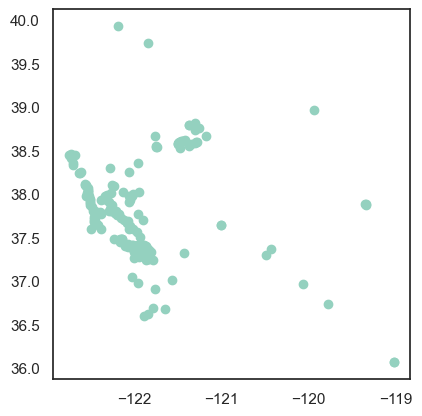

In [86]:
bus_stations = pois_df[pois_df['amenity'] == 'bus_station']
bus_stations.plot()

In [87]:
POI = bus_stations.copy()
POI = POI[(POI["lat"] >= city_bounds["min_lat"]) & (POI["lat"] <= city_bounds["max_lat"]) &
        (POI["lon"] >= city_bounds["min_lon"]) &
        (POI["lon"] <= city_bounds["max_lon"])]
POI["Coordinates"] = list(zip(POI["lat"].round(4), POI["lon"].round(4)))
POI_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=10, control_scale=True, max_zoom=20)
positions = list(POI['Coordinates'].unique())

for position in positions:
    name = POI.loc[POI['Coordinates'] == position, 'name'].values[0]
   
    marker = folium.Marker(location=position, popup=f'{name}')
    marker.add_to(POI_map)

display(POI_map)

# Displaying the location of stations

In [88]:
#make a stations_df to use for displaying locations 
columns = ['start_station_id','start_station_lat','start_station_lon']
stations_df = baywheels_df[columns]
stations_df = stations_df.drop_duplicates(subset=['start_station_id'])
stations_df.head()


start_station_id  start_station_lat  start_station_lon
0               219          37.809824        -122.280192
1               202          37.800754        -122.274894
2               182          37.809013        -122.268247
3               178          37.819381        -122.261928
4               195          37.812314        -122.260779

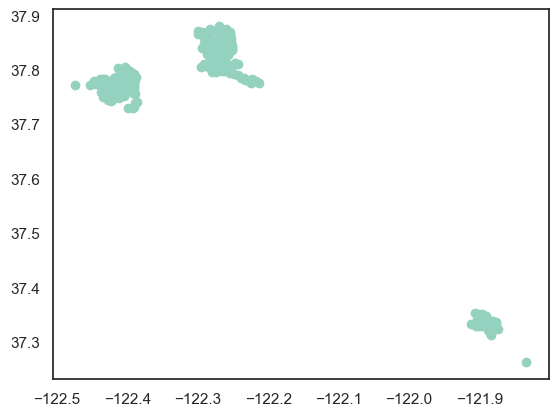

In [89]:
x = stations_df['start_station_lat']
y = stations_df['start_station_lon']
plt.scatter(y,x)

In [90]:
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}')
    marker.add_to(stations_map)

stations_map

In [91]:
#try to cluster the stations in three groups
from sklearn.cluster import KMeans

X = stations_df[['start_station_lat','start_station_lon']]

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)

# Get the cluster labels for each station
stations_df['area_label'] = kmeans.labels_
stations_df.head()



/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


start_station_id  start_station_lat  start_station_lon  area_label
0               219          37.809824        -122.280192           0
1               202          37.800754        -122.274894           0
2               182          37.809013        -122.268247           0
3               178          37.819381        -122.261928           0
4               195          37.812314        -122.260779           0

In [92]:
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    cluster_label = row['area_label']
    
    # Create a marker for each station with cluster-specific colors
    if cluster_label == 0:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    elif cluster_label == 1:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    else:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    
    marker.add_to(stations_map)

display(stations_map)

In [93]:
#add the 'area_label' to baywheels_df

baywheels_geo = baywheels_geo.merge(stations_df[['start_station_id', 'area_label']], on='start_station_id', how='left')
baywheels_geo

start_time             end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id    trip_duration        idle_time  Weekday  Is_Weekday  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature                     geometry  area_label
0        2018-01-07 08:05:33  2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11  0 days 00:06:02              NaN        6           1                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0  POINT (-122.28019 37.80982)           0
1        2018-01-12 14:06:46  2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11  0 days 00:05:56  5 days 05:55:11        4           0               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0  POINT (-122.27489 37.80075)           0
2        2018-01-12 15:57:16  2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11  0 days 00:08:01  0 days 01:44:34        4           0               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0  POINT (-122.26825 37.80901)           0
3        2018-01-14 11:02:47  2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11  0 days 00:05:17  1 days 18:57:30        6           1               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0  POINT (-122.26193 37.81938)           0
4        2018-01-14 11:48:48  2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11  0 days 00:08:35  0 days 00:40:44        6           1               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0  POINT (-122.26078 37.81231)           0
...                      ...                  ...               ...                ...                ...             ...              ...              ...      ...              ...              ...      ...         ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...            ...                  ...                ...                     ...                   ...                          ...         ...
1863716  2018-12-31 13:07:21  2018-12-31 13:21:59               364          37.772886        -122.389940               3        37.786375      -122.404904     6234  0 days 00:14:38  0 days 01:16:38        0           0               13.0       

In [94]:
## make a seperate dataframe for each area 
san_jose_df_points = stations_df[stations_df['area_label'] == 1]

san_fran_df_points = stations_df[stations_df['area_label'] == 2]

oakland_df_points = stations_df[stations_df['area_label'] == 0]
oakland_df_points.head()



start_station_id  start_station_lat  start_station_lon  area_label
0               219          37.809824        -122.280192           0
1               202          37.800754        -122.274894           0
2               182          37.809013        -122.268247           0
3               178          37.819381        -122.261928           0
4               195          37.812314        -122.260779           0

In [95]:
san_jose_df_full = baywheels_geo[baywheels_geo['area_label'] == 1]

san_fran_df_full = baywheels_geo[baywheels_geo['area_label'] == 2]

oakland_df_full = baywheels_geo[baywheels_geo['area_label'] == 0]
oakland_df_full.head()

start_time             end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id    trip_duration        idle_time  Weekday  Is_Weekday  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature                     geometry  area_label
0  2018-01-07 08:05:33  2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11  0 days 00:06:02              NaN        6           1                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0  POINT (-122.28019 37.80982)           0
1  2018-01-12 14:06:46  2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11  0 days 00:05:56  5 days 05:55:11        4           0               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0  POINT (-122.27489 37.80075)           0
2  2018-01-12 15:57:16  2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11  0 days 00:08:01  0 days 01:44:34        4           0               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0  POINT (-122.26825 37.80901)           0
3  2018-01-14 11:02:47  2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11  0 days 00:05:17  1 days 18:57:30        6           1               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0  POINT (-122.26193 37.81938)           0
4  2018-01-14 11:48:48  2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11  0 days 00:08:35  0 days 00:40:44        6           1               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0  POINT (-122.26078 37.81231)           0

In [96]:
#san_fran_df.plot()


In [97]:
center_map = [37.737, -122.43] #center of our coordinates
san_fran_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

for index, row in san_fran_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    marker.add_to(san_fran_map)

san_fran_map



In [98]:
san_jose_df_points.plot

In [99]:
center_map = [37.300964,-121.882016] #center of our coordinates
san_jose_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in san_jose_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    marker.add_to(san_jose_map)

san_jose_map


In [100]:
center_map = [37.830824, -122.2801920] #center of our coordinates
oakland_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in oakland_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    marker.add_to(oakland_map)

oakland_map


In [101]:
#display list of all stations in the corresponding areas
oakland_list = oakland_df_points['start_station_id'].tolist()
san_jose_list = san_jose_df_points['start_station_id'].tolist()
san_fran_list = san_fran_df_points['start_station_id'].tolist()
print('In Oakland are the following stations:', oakland_list)
print('\nIn San Francisco are the following stations:', san_fran_list)
print('\nIn San Jose are the following stations:', san_jose_list)

In Oakland are the following stations: [219, 202, 182, 178, 195, 215, 162, 163, 167, 212, 233, 201, 186, 194, 181, 196, 7, 337, 197, 183, 180, 164, 189, 153, 150, 187, 203, 200, 239, 245, 247, 250, 251, 259, 256, 176, 211, 198, 160, 231, 234, 227, 174, 188, 230, 266, 252, 270, 340, 274, 157, 241, 169, 193, 158, 168, 269, 272, 220, 338, 159, 265, 248, 254, 253, 249, 171, 205, 246, 18, 240, 243, 315, 151, 166, 267, 242, 273, 268, 214, 191, 232, 190, 218, 155, 372, 46, 339, 222, 237, 210, 213, 179, 175, 235, 238, 244, 206, 177, 172, 149, 209, 204, 207, 173, 221, 154, 236, 148, 216, 263, 192, 255, 258, 152, 351, 262, 170, 225, 228, 156, 271, 217, 257, 229, 226, 224]

In San Francisco are the following stations: [60, 324, 37, 53, 5, 25, 66, 74, 21, 49, 133, 137, 36, 28, 16, 17, 27, 24, 30, 44, 81, 93, 285, 34, 19, 6, 323, 22, 107, 129, 119, 89, 122, 26, 90, 114, 80, 130, 141, 97, 3, 42, 41, 116, 72, 15, 14, 58, 78, 43, 98, 105, 120, 75, 79, 13, 95, 33, 67, 4, 86, 23, 342, 20, 29, 59, 125, 1

## finding most unused stations

In [102]:
# calculate the number of rentals starting & ending from each station, then merge them into one dataframe

start_station_counts = baywheels_df['start_station_id'].value_counts()
end_station_counts = baywheels_df['end_station_id'].value_counts()

"""
# checking all the stations appear:

start_sta = sorted(list(set(baywheels_df['start_station_id'].tolist())))
end_sta = sorted(list(set(baywheels_df['end_station_id'].tolist())))

if start_sta == end_sta:
    print("all stations are here")
else:
    print("problem!")

"""

station_utilization = pd.DataFrame({
    'station_id': start_station_counts.index,
    'pick-ups': start_station_counts.values,
    'returns': end_station_counts.values,
    'total': start_station_counts.values + end_station_counts.values})

# Display the station utilization dataframe


display(station_utilization)




station_id  pick-ups  returns  total
0            15     38461    50000  88461
1            67     37617    44113  81730
2            30     35092    42970  78062
3            58     34918    39222  74140
4            81     33716    35955  69671
5             6     33390    34365  67755
6            21     32131    33086  65217
7             3     31656    32786  64442
8            16     28367    28592  56959
9            22     26535    26002  52537
10            5     25007    23926  48933
11           17     21883    21094  42977
12           66     21649    20427  42076
13           90     18216    20071  38287
14           93     18150    19365  37515
15           50     17953    19213  37166
16           27     17778    18841  36619
17           44     17664    18440  36104
18          182     16435    18168  34603
19           23     15907    16746  32653
20           19     15611    15325  30936
21          243     14118    14411  28529
22          134     13651    13775  27426
23           37     13453    13615  27068
24          176     12791    13151  25942
25          126     12788    12884  25672
26           20     12678    12521  25199
27           24     12644    12471  25115
28           70     12448    12408  24856
29          324     12410    12220  24630
30           60     12148    12164  24312
31           28     12118    12095  24213
32           41     12089    12048  24137
33          303     12029    11988  24017
34           43     12024    11811  23835
35           61     11727    11730  23457
36           98     11621    11500  23121
37           14     11549    11491  23040
38          284     11490    11438  22928
39          114     11408    11387  22795
40           49     11373    11296  22669
41            8     11322    11261  22583
42          239     11260    11118  22378
43           89     11079    10969  22048
44          321     11074    10900  21974
45           47     11074    10805  21879
46           36     10890    10786  21676
47           74     10795    10539  21334
48           59     10617    10415  21032
49          163     10359    10381  20740
50          323     10106    10097  20203
51            9      9989    10032  20021
52           11      9731     9967  19698
53           25      9694     9912  19606
54           88      9503     9813  19316
55          121      9472     9747  19219
56          343      9306     9591  18897
57          196      9291     9548  18839
58          109      9260     9413  18673
59           62      9209     9399  18608
60          160      9176     9266  18442
61           80      9075     9208  18283
62           75      9001     9109  18110
63           86      8883     9018  17901
64          197      8841     8874  17715
65           64      8771     8666  17437
66          245      8711     8642  17353
67           13      8677     8566  17243
68            7      8658     8462  17120
69          195      8555     8419  16974
70          223      8541     8378  16919
71           77      8375     8289  16664
72           76      8306     8201  16507
73           79      8262     8041  16303
74          200      8128     8025  16153
75           78      8104     7895  15999
76          181      8094     7805  15899
77          120      7859     7765  15624
78           10      7816     7739  15555
79          130      7814     7725  15539
80          310      7676     7702  15378
81          127      7657     7698  15355
82          241      7612     7636  15248
83          129      7582     7546  15128
84          112      7571     7440  15011
85          350      7551     7328  14879
86          104      7438     7319  14757
87          133      7387     7313  14700
88           42      7367     7248  14615
89          171      7299     6987  14286
90          296      7084     6953  14037
91           95      7063     6690  13753
92          141      6981     6612  13593
93          139      6930     6476  13406
94          285

this is a regular grah, but since we have many stations and varius number of rentals - i think the praphs are not really helpful here.

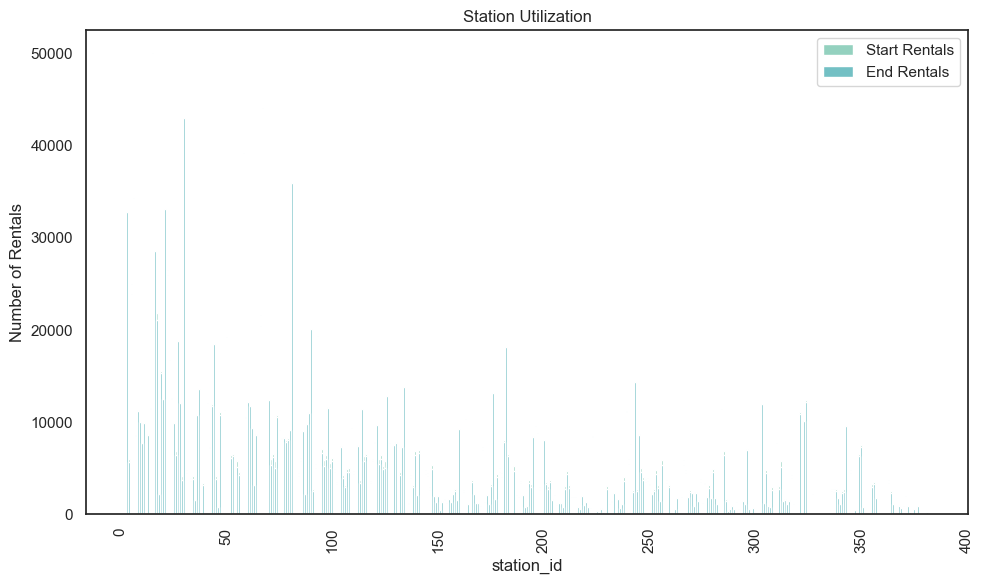

In [114]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(station_utilization['station_id'], station_utilization['pick-ups'], label='Start Rentals')
plt.bar(station_utilization['station_id'], station_utilization['returns'], label='End Rentals')
plt.xlabel('station_id')
plt.ylabel('Number of Rentals')
plt.title('Station Utilization')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

log graph:

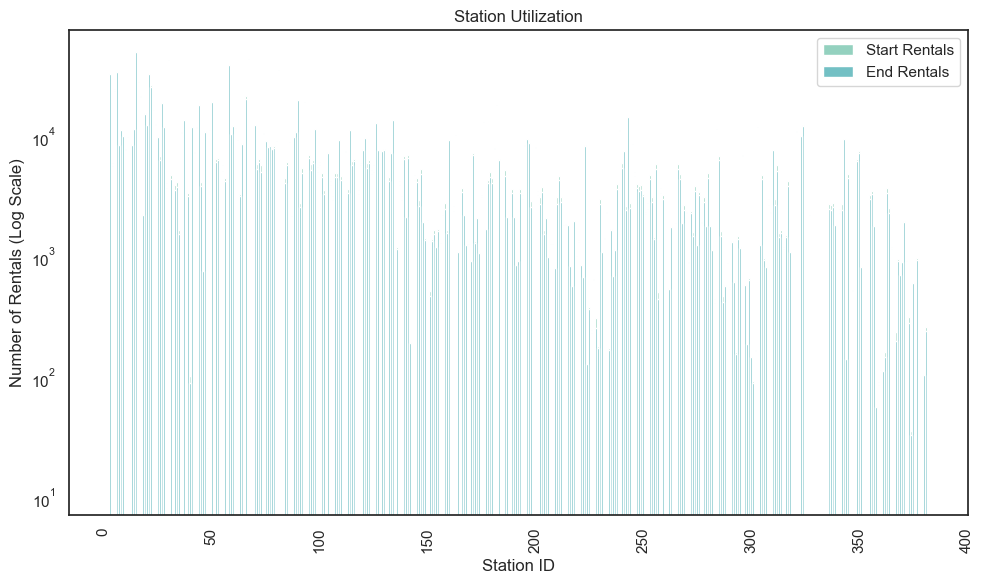

In [116]:

plt.figure(figsize=(10, 6))
plt.bar(station_utilization['station_id'], station_utilization['pick-ups'], label='Start Rentals')
plt.bar(station_utilization['station_id'], station_utilization['returns'], label='End Rentals')
plt.xlabel('Station ID')
plt.ylabel('Number of Rentals (Log Scale)')
plt.title('Station Utilization')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

seperated graphs for returns\pick ups stations:

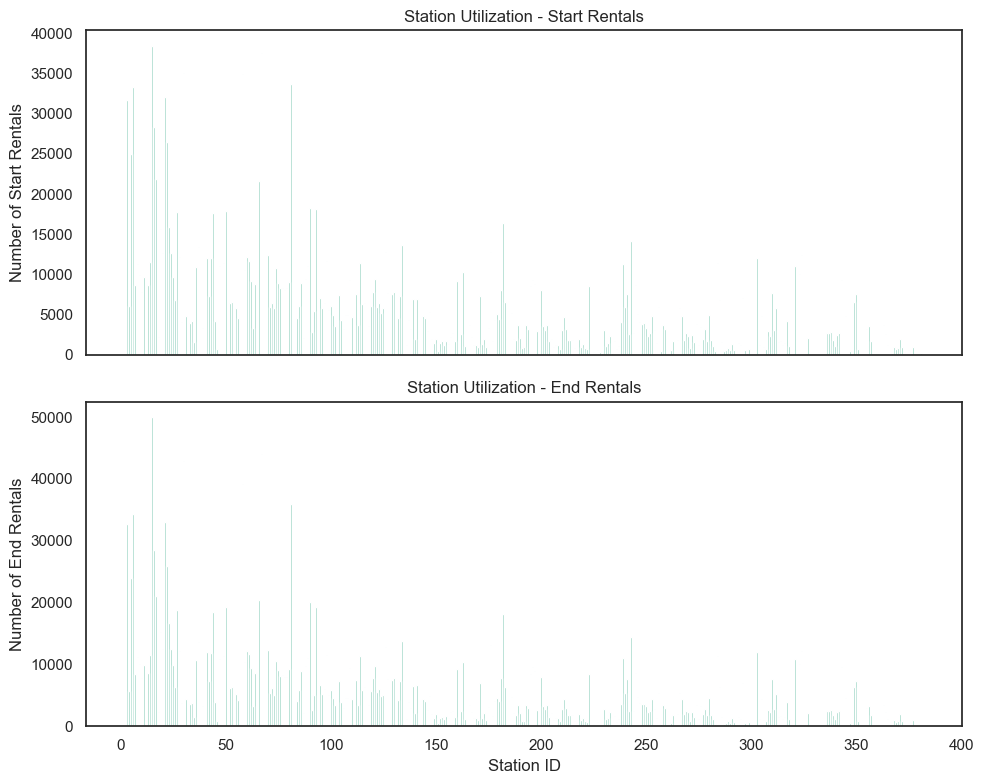

In [118]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot for start rentals
ax1.bar(station_utilization['station_id'], station_utilization['pick-ups'])
ax1.set_ylabel('Number of Start Rentals')
ax1.set_title('Station Utilization - Start Rentals')

# Plot for end rentals
ax2.bar(station_utilization['station_id'], station_utilization['returns'])
ax2.set_xlabel('Station ID')
ax2.set_ylabel('Number of End Rentals')
ax2.set_title('Station Utilization - End Rentals')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

count unique              top freq
start_station_id                                    
3                 31656   3351  0 days 00:07:34   70
4                  6058   2097  0 days 00:09:00   17
5                 25007   3011  0 days 00:05:59   70
6                 33390   4551  0 days 00:06:06   71
7                  8658   1850  0 days 00:05:47   25
8                 11322   3125  0 days 00:03:17   26
9                  9989   2055  0 days 00:04:08   25
10                 7816   2498  0 days 00:07:24   15
11                 9731   2098  0 days 00:03:27   23
13                 8677   1898  0 days 00:04:42   27
14                11549   2223  0 days 00:12:05   23
15                38461   4737  0 days 00:06:25   69
16                28367   2786  0 days 00:09:11   46
17                21883   2472  0 days 00:03:29   46
18                 2253   1074  0 days 00:04:06   11
19                15611   2289  0 days 00:08:50   40
20                12678   2361  0 days 00:03:58   26
21                32131   2750  0 days 00:06:49   67
22                26535   2229  0 days 00:09:45   54
23                15907   2202  0 days 00:08:35   45
24                12644   2119  0 days 00:07:37   30
25                 9694   1733  0 days 00:07:13   31
26                 6837   1683  0 days 00:08:25   16
27                17778   2007  0 days 00:08:23   49
28                12118   2438  0 days 00:07:16   31
29                 4119   1858  0 days 00:17:00   10
30                35092   2291  0 days 00:09:11   78
31                 4805   1957  0 days 00:11:49   12
33                 3942   1408  0 days 00:07:47   13
34                 4156   1629  0 days 00:08:55   14
35                 1664    899  0 days 00:04:34   13
36                10890   1940  0 days 00:05:40   30
37                13453   1928  0 days 00:06:36   40
39                 3394   1437  0 days 00:17:32   11
40                  102     99  0 days 00:18:08    2
41                12089   2029  0 days 00:08:50   30
42                 7367   1892  0 days 00:10:52   18
43                12024   1801  0 days 00:06:54   37
44                17664   2630  0 days 00:04:47   42
45                 4187   1263  0 days 00:06:41   17
46                  719    569  0 days 00:20:28    4
47                11074   1733  0 days 00:06:22   34
48                   11     11  0 days 00:16:53    1
49                11373   1902  0 days 00:07:01   38
50                17953   2268  0 days 00:06:58   50
52                 6444   1987  0 days 00:15:32   12
53                 6579   2040  0 days 00:04:41   14
55                 5849   1783  0 days 00:05:51   17
56                 4559   1408  0 days 00:09:33   11
58                34918   2524  0 days 00:08:25   73
59                10617   1724  0 days 00:10:45   24
60                12148   1802  0 days 00:06:50   42
61                11727   1883  0 days 00:07:48   36
62                 9209   1586  0 days 00:05:58   29
63                 3317   1254  0 days 00:09:43   12
64                 8771   1510  0 days 00:06:41   27
66                21649   2317  0 days 00:09:25   49
67                37617   2134  0 days 00:01:04  124
70                12448   3504  0 days 00:18:13   19
71                 5967   2198  0 days 00:13:15   11
72                 6508   1773  0 days 00:13:25   13
73                 5773   1738  0 days 00:14:14   14
74                10795   1992  0 days 00:13:31   24
75                 9001   1717  0 days 00:09:52   20
76                 8306   1636  0 days 00:04:05   22
77                 8375   1513  0 days 00:08:48   25
78                 8104   1603  0 days 00:07:13   24
79                 8262   1441  0 days 00:05:43   27
80                 9075   1514  0 days 00:08:13   25
81                33716   2451  0 days 00:09:26   88
84                 4546   1594  0 days 00:03:24   11
85                 6090   1587  0 days 00:05:44   15
86                 8883   1816  0 days 00:04:40   29
87                 2127   1002  0 days 00:0

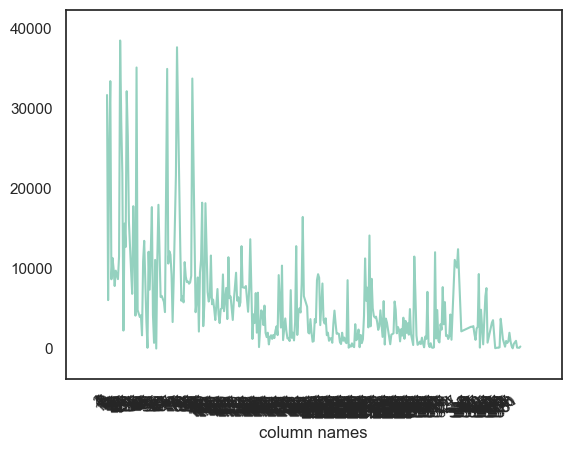

In [119]:
stations_trip_duration_start = baywheels_df.groupby('start_station_id')['trip_duration'].describe()

display(stations_trip_duration_start)

plt.plot(stations_trip_duration_start.index, stations_trip_duration_start['count'])
plt.xticks(stations_trip_duration_start.index, stations_trip_duration_start.index, rotation=45,
horizontalalignment='right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

showing number of total rentals of a station on the map. 

can change the numbers we are reffering to. i chose:

red; 365 - because it means less than 1 rental a day in this year

orange; the median 

green; others

(can also seperate for pick ups and returns but I dont know if needed)

### display stations color divided depending on the number of total interactions with the station

In [113]:
# calculation of median & mean:
import numpy as np

print("median:", np.median(station_utilization['total']), "\nmean:", station_utilization['total'].mean())

# Create a map object
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding usage data for the current station_id
    row = station_utilization.loc[station_utilization['station_id'] == station_id]
    if not row.empty:
        usage_value = row.iloc[0]['total']

        # Determine the marker color based on the usage value
        if usage_value < 365:
            color = 'red'
        elif usage_value <= np.median(station_utilization['total']): #can also use mean instade: (station_utilization['total'].mean())
            color = 'orange'
        else:
            color = 'green'

        # Create a marker with the determined color
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id} \nInteractions: {usage_value}', icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
stations_map



median: 6863.0 
mean: 11261.15407854985


### display stations color divided depending on the duration of the trips

In [121]:
from datetime import timedelta

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding trip duration statistics for the current station_id
    if station_id in stations_trip_duration_start.index:
        trip_stats = stations_trip_duration_start.loc[station_id]
        mean_duration = trip_stats['mean']
        max_duration = trip_stats['max']
        min_duration = trip_stats['min']

        # Convert timedelta values to minutes
        mean_duration_minutes = mean_duration.total_seconds() / 60
        max_duration_minutes = max_duration.total_seconds() / 60
        min_duration_minutes = min_duration.total_seconds() / 60

        # Determine the marker color based on the trip duration statistics
        if mean_duration < timedelta(minutes=10):
            color = 'green'
        elif mean_duration <= timedelta(minutes=20):
            color = 'orange'
        else:
            color = 'red'

        # Create a marker with the determined color and tooltip showing trip duration statistics
        tooltip = f'Station ID: {station_id}\nMean Duration: {mean_duration_minutes:.2f} minutes\nMax Duration: {max_duration_minutes:.2f} minutes\nMin Duration: {min_duration_minutes:.2f} minutes'
        marker = folium.Marker([latitude, longitude], popup=tooltip, icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
stations_map


KeyError: 'mean'

### the rest does not work

In [ ]:
import folium
import numpy as np

# Define the quartile thresholds for the average travel time in minutes
thresholds = np.percentile(stations_trip_doration_start['mean'], [25, 50, 75])

# Define the color range for the average travel time
color_range = ['#00FF00', '#FFFF00', '#FF0000']  # Green, Yellow, Red

# Create the folium map
center_map = [37.6, -122.1]
stations_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=10)

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding trip duration statistics for the current station_id
    if station_id in stations_trip_doration_start.index:
        trip_stats = stations_trip_doration_start.loc[station_id]
        mean_duration = trip_stats['mean']
        max_duration = trip_stats['max']
        min_duration = trip_stats['min']

        # Determine the color based on the average travel time
        color_index = sum(mean_duration > thresholds)
        color = color_range[color_index]

        # Create a marker with the determined color and tooltip showing trip duration statistics
        tooltip = f'Station ID: {station_id}\nMean Duration: {mean_duration:.2f} minutes\nMax Duration: {max_duration:.2f} minutes\nMin Duration: {min_duration:.2f} minutes'
        marker = folium.Marker([latitude, longitude], popup=tooltip, icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
display(stations_map)


In [ ]:
import folium
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Finding the median trip duration for each starting station
stations_trip_duration_start = baywheels_df.groupby('start_station_id')['trip_duration'].median()

# Create a colormap with a gradient from green to red
cmap = LinearSegmentedColormap.from_list('gradient', ['#00FF00', '#FF0000'])

# Create the folium map
center_map = [37.6, -122.1]
stations_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=10)

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding trip duration for the current station_id
    trip_duration = stations_trip_duration_start.get(station_id)

    if trip_duration:
        # Normalize the trip duration between 0 and 1
        normalized_value = (trip_duration - stations_trip_duration_start.min()) / (stations_trip_duration_start.max() - stations_trip_duration_start.min())

        # Map the normalized value to a color from the colormap
        color = cmap(normalized_value)

        # Create a marker with the determined color
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
display(stations_map)


In [ ]:
import folium
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#finding from which stations are the longest rentals
stations_trip_doration_start = baywheels_df.groupby('start_station_id')['trip_duration'].describe()

# Create a colormap with a gradient from green to red
cmap = LinearSegmentedColormap.from_list('gradient', ['#00FF00', '#FF0000'])

# Create the folium map
center_map = [37.6, -122.1]
stations_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=10)

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding usage data for the current station_id
    usage_row = station_utilization.loc[station_utilization['station_id'] == station_id]
    if not usage_row.empty:
        usage_value = usage_row.iloc[0]['total']

        # Normalize the usage value between 0 and 1
        normalized_value = (usage_value - station_utilization['total'].min()) / (station_utilization['total'].max() - station_utilization['total'].min())

        # Map the normalized value to a color from the colormap
        color = cmap(normalized_value)

        # Create a marker with the determined color
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
display(stations_map)

"""

    # Find the corresponding trip duration statistics for the current station_id
    if station_id in stations_trip_doration_start.index:
        trip_stats = stations_trip_doration_start.loc[station_id]
        mean_duration = trip_stats['mean']
        max_duration = trip_stats['max']
        min_duration = trip_stats['min']

        # Determine the marker color based on the trip duration statistics
        if mean_duration < 10:
            color = 'green'
        elif mean_duration <= 20:
            color = 'orange'
        else:
            color = 'red'

        # Create a marker with the determined color and tooltip showing trip duration statistics
        tooltip = f'Station ID: {station_id}\nMean Duration: {mean_duration:.2f} minutes\nMax Duration: {max_duration:.2f} minutes\nMin Duration: {min_duration:.2f} minutes'
        marker = folium.Marker([latitude, longitude], popup=tooltip, icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
display(stations_map)
"""

In [ ]:

#finding from which are the stations that the bikes where returnd after the longest time.
stations_trip_doration_end = baywheels_df.groupby('end_station_id')['trip_duration'].describe()

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['end_station_id']
    latitude = row['end_station_lat']
    longitude = row['end_station_lon']

    # Find the corresponding trip duration statistics for the current station_id
    if station_id in stations_trip_doration_start.index:
        trip_stats = stations_trip_doration_start.loc[station_id]
        mean_duration = trip_stats['mean']
        max_duration = trip_stats['max']
        min_duration = trip_stats['min']

        # Determine the marker color based on the trip duration statistics
        if mean_duration < 10:
            color = 'green'
        elif mean_duration <= 20:
            color = 'orange'
        else:
            color = 'red'

        # Create a marker with the determined color and tooltip showing trip duration statistics
        tooltip = f'Station ID: {station_id}\nMean Duration: {mean_duration:.2f} minutes\nMax Duration: {max_duration:.2f} minutes\nMin Duration: {min_duration:.2f} minutes'
        marker = folium.Marker([latitude, longitude], popup=tooltip, icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
display(stations_map)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Analysis by Starting Station
ana = baywheels_df.groupby('start_station_id')['trip_duration'].describe()
display(ana)
ana.plot(ax=mean,kind='bar', figsize=(10, 6))
#plt.bar(ana['start_station_id'], ana['mean'])
plt.xlabel('Starting Station ID')
plt.ylabel('Trip Duration AVG')
plt.title('Trip Duration Analysis by Starting Station')
plt.show()

#start_station_analysis = baywheels_df.groupby('')[''].describe()
#display(start_station_analysis)

# Plotting analysis by Starting Station
start_station_analysis.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Starting Station ID')
plt.ylabel('Trip Duration')
plt.title('Trip Duration Analysis by Starting Station')
plt.show()

# Analysis by Ending Station
end_station_analysis = baywheels_df.groupby('end_station_id')['trip_duration'].describe()

# Plotting analysis by Ending Station
end_station_analysis.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Ending Station ID')
plt.ylabel('Trip Duration')
plt.title('Trip Duration Analysis by Ending Station')
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

# Assuming you have latitude, longitude, and usage data for the stations in lists
latitudes = baywheels_df['start_station_lat']
longitudes = baywheels_df['start_station_lon']
usage = [usage1, usage2, usage3, ...]

# Create a map centered at the average latitude and longitude
center_lat = sum(latitudes) / len(latitudes)
center_lon = sum(longitudes) / len(longitudes)
station_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Create a list of points with latitude, longitude, and usage
points = [[lat, lon, use] for lat, lon, use in zip(latitudes, longitudes, usage)]

# Add heatmap to the map
HeatMap(points).add_to(station_map)

# Save the map to an HTML file
station_map.save('station_heatmap.html')
